In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install lonboard

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer

####Task 1

In [4]:
chicago = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/chicago_parcels/Chicago_parcels.shp')

####Task 2

In [8]:
chicago.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["NAD83",DATUM[ ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
chicago.head(5)

POLY_ID  ID  AREA    PIN_OLD        PIN  \
0        1  93  0.01  836300010  836300010   
1        2  94  0.00  836300011  836300011   
2        3  96  0.02  836300013  836300013   
3        4  95  0.01  836300012  836300012   
4        5  92  0.01  836300009  836300009   

                                            geometry  
0  POLYGON ((1091182.694 1942890.287, 1091173.159...  
1  POLYGON ((1092430.298 1943191.955, 1092463.452...  
2  POLYGON ((1092323.996 1942962.61, 1092301.306 ...  
3  POLYGON ((1092024.119 1942447.762, 1091997.19 ...  
4  POLYGON ((1091970.533 1942338.191, 1091929.082...

This displays the data types (e.g. int, float, geometry) within the dataframe

In [ ]:
chicago.dtypes

POLY_ID        int32
ID             int64
AREA         float64
PIN_OLD        int64
PIN            int64
geometry    geometry
dtype: object

####Task 3

The below code imports the ability to render ploygons. This function was then used with the chicago dataframe.

In [5]:
from lonboard import Map, SolidPolygonLayer

In [6]:
gdf = gpd.GeoDataFrame(chicago)

In [7]:
layer = SolidPolygonLayer.from_geopandas(
    gdf,
    get_fill_color=[255,0,0],)
m=Map(layer)
m

/usr/local/lib/python3.10/dist-packages/lonboard/_geoarrow/ops/reproject.py:107: UserWarning: Input being reprojected to EPSG:4326 CRS.
Lonboard is only able to render data in EPSG:4326 projection.
  warnings.warn(


Map(custom_attribution='', layers=(SolidPolygonLayer(get_fill_color=[255, 0, 0], table=arro3.core.Table
------…

####Task 4

This code extracts the coordinates of the centroid of the geometries in the chicago dataframe and assign them to the latitude and longitude and then adds them to the chicago dataframe.

In [9]:
chicago[['latitude','longitude']]=chicago.geometry.centroid.get_coordinates(ignore_index=True)

Pearsons corelation coefficient is applied to all the attributes in the dataset to explore correlations. When considering the correlation between longitude/latitude and numerical attributes, the strongest correlation is between longitude and ID, potentially implying longitude was used to assign IDs.

In [11]:
chicago.corr(method='pearson', numeric_only=True)

POLY_ID        ID      AREA   PIN_OLD       PIN  latitude  \
POLY_ID    1.000000  0.281011 -0.007202  0.099622  0.099810  0.592573   
ID         0.281011  1.000000  0.007726 -0.479761 -0.449598  0.705091   
AREA      -0.007202  0.007726  1.000000 -0.012953 -0.013246  0.005312   
PIN_OLD    0.099622 -0.479761 -0.012953  1.000000  0.982657 -0.337835   
PIN        0.099810 -0.449598 -0.013246  0.982657  1.000000 -0.346813   
latitude   0.592573  0.705091  0.005312 -0.337835 -0.346813  1.000000   
longitude -0.156919 -0.949257 -0.010339  0.478436  0.485506 -0.612231   

           longitude  
POLY_ID    -0.156919  
ID         -0.949257  
AREA       -0.010339  
PIN_OLD     0.478436  
PIN         0.485506  
latitude   -0.612231  
longitude   1.000000

####Task 5 & 6

K-means tests are carried out with varying values of n_clusters. All are put to a random_state of 42. kmeans.fit_predict() applies the k-means algorithm to the selected variables. Features of the plot are then defined. clumn defines how thw geometries will be coloured, in this case based on the kmeans_clusters. categotical being set to true ensures that each cluster is assigned its own colour. legend = True inputs a legend on the map. figsize defines the size of the figure and cmap defines the colour scheme.

<Axes: >

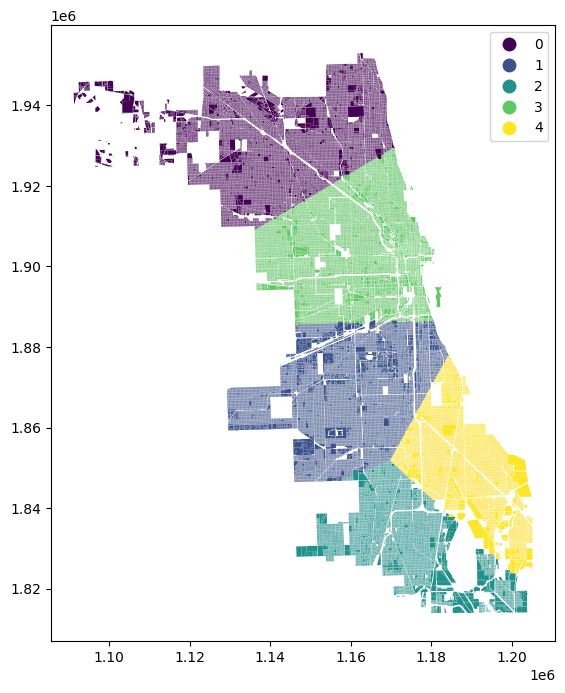

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
chicago['kmeans_cluster_5'] = kmeans_5.fit_predict(chicago[['longitude','latitude']])
chicago.plot(column='kmeans_cluster_5', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')

<Axes: >

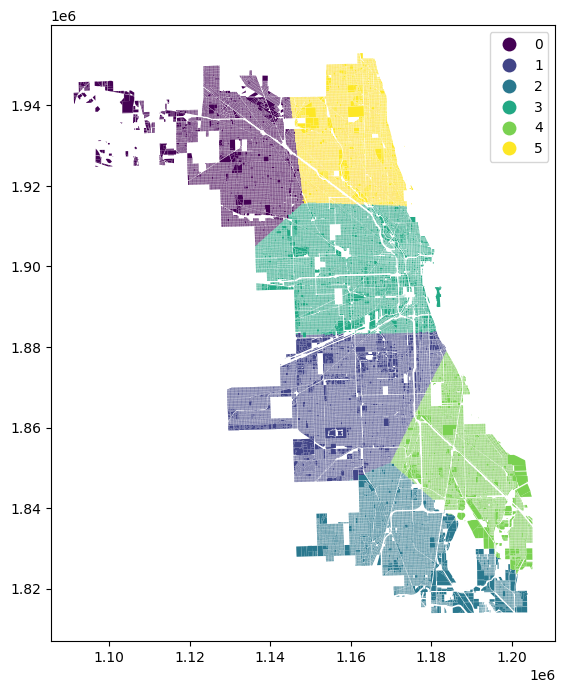

In [ ]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
chicago['kmeans_cluster_6'] = kmeans_6.fit_predict(chicago[['longitude','latitude']])
chicago.plot(column='kmeans_cluster_6', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')

<Axes: >

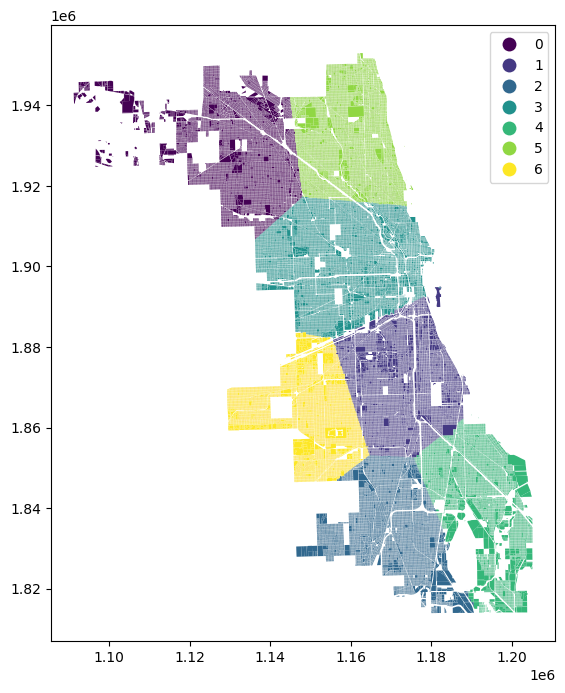

In [ ]:
kmeans_7 = KMeans(n_clusters=7, random_state=42)
chicago['kmeans_cluster_7'] = kmeans_7.fit_predict(chicago[['longitude','latitude']])
chicago.plot(column='kmeans_cluster_7', categorical=True, legend=True, figsize=(8, 8), cmap='viridis')

#####Task 7

n_clusters=7 would be the 'optimal' value out of the values tested as it is the largest of the n_cluster values and increasing the number of clusters reduces the variance within each cluster. Additionally, the results are still interpretable, the number of clusters is not too many that the results have become confusing.

#####Task 8 & 9

A function is defined called visualize_dbscan_parameters which involves the parameters chicago, epsilon values and min_samples. Subplots are then coded for. for loops are then used to carry out a dbscan with variable epsilon_values and min_samples_values. The plotting of the results is then coded for, followed by adjustments to the plot layout. Values to be tested for the epsilon_values and the min_samples_values variables are then set. The function is then run.

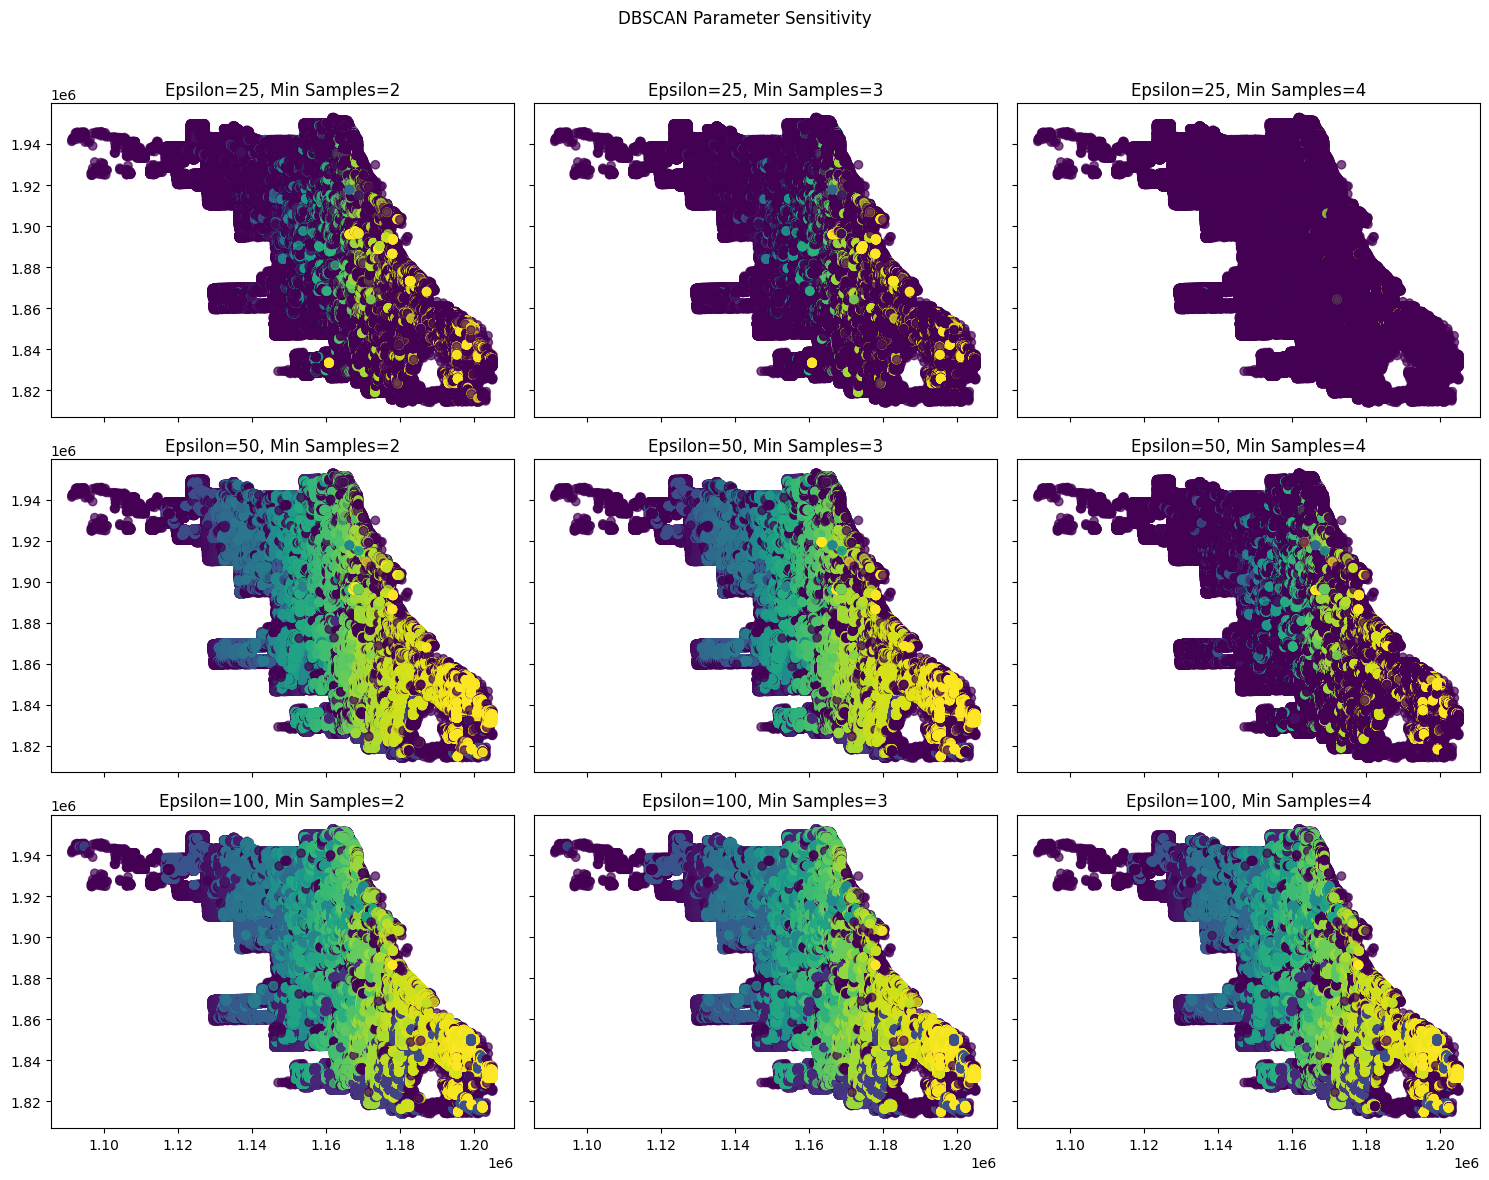

In [ ]:
def visualize_dbscan_parameters(chicago, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 12), sharex=True, sharey=True)
    fig.suptitle('DBSCAN Parameter Sensitivity')

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            chicago['cluster_result'] = dbscan.fit_predict(chicago[['latitude', 'longitude']])
            axes[i, j].scatter(chicago['latitude'], chicago['longitude'], c=chicago['cluster_result'], cmap='viridis', alpha=0.7)
            axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

epsilon_values = [25, 50, 100]
min_samples_values = [2, 3, 4]

visualize_dbscan_parameters(chicago, epsilon_values, min_samples_values)

#####Task 10

DBSCAN is a density-based clustering algorithm that groups together closely packed data points and identifies points that lie alone in low-density regions as noise. As this is a densly populated dataset, the epsilon (maximum distance between two points in order for them to be considered neighbours) must be quite large. This is seen with more distinct clusters and less noise being seen as the epsilon increases from 25 to 100. A smaller min samples (the number of points needed to form a cluster) is better for this dataset as when the min sample increases from 2 to 4 clusters become less distinct. This clustering algorithm would be useful for determining smaller regions in chicago.



